2    65
1    62
0    51
Name: cluster, dtype: int64
     alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
0  13.134118    3.307255  2.417647          21.241176   98.666667   
1  13.676774    1.997903  2.466290          17.462903  107.967742   
2  12.250923    1.897385  2.231231          20.063077   92.738462   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       1.683922    0.818824              0.451961         1.145882   
1       2.847581    3.003226              0.292097         1.922097   
2       2.247692    2.050000              0.357692         1.624154   

   color_intensity       hue  od280/od315_of_diluted_wines      proline  
0         7.234706  0.691961                      1.696667   619.058824  
1         5.453548  1.065484                      3.163387  1100.225806  
2         2.973077  1.062708                      2.803385   510.169231  


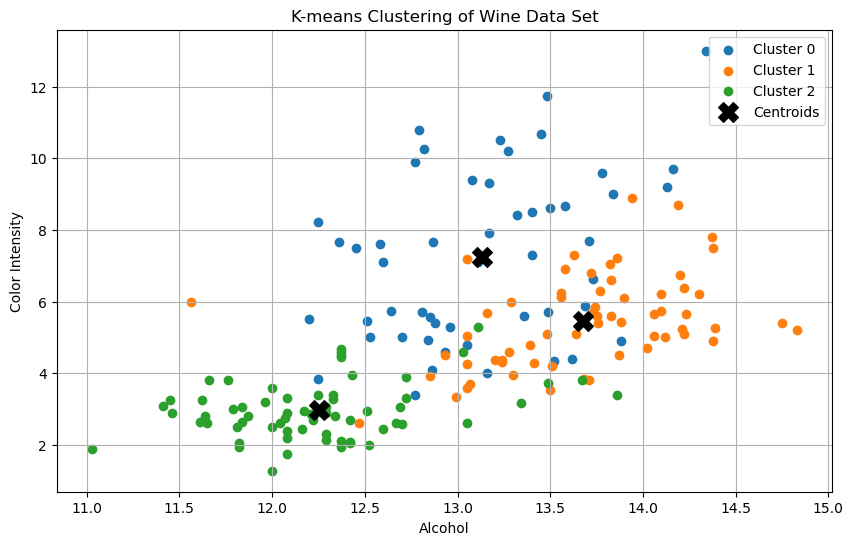

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Завантаження датасету
data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)

# Передбачування кількості кластерів (у даному випадку ми знаємо, що існує 3 сорти вин)
n_clusters = 3

# Масштабування даних
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

# Кластеризація з використанням k-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
wine_df['cluster'] = kmeans.fit_predict(wine_scaled)

# Виведення результатів кластеризації
print(wine_df['cluster'].value_counts())

# Виведення центроїдів кластерів
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=data.feature_names)
print(centroids)

# Візуалізація результатів кластеризації
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = wine_df[wine_df['cluster'] == cluster]
    plt.scatter(cluster_data['alcohol'], cluster_data['color_intensity'], label=f'Cluster {cluster}')
plt.scatter(centroids['alcohol'], centroids['color_intensity'], marker='X', color='black', s=200, label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('K-means Clustering of Wine Data Set')
plt.legend()
plt.grid(True)
plt.show()

-1    178
Name: cluster, dtype: int64


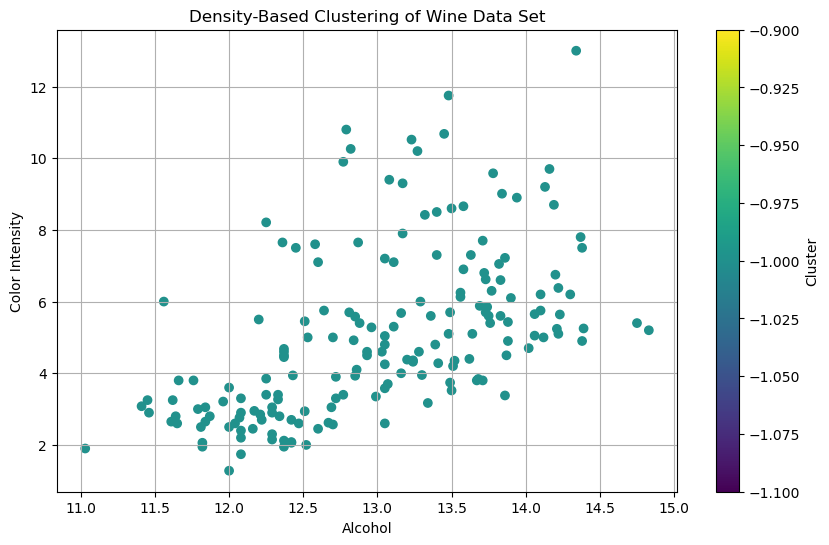

In [4]:
from sklearn.cluster import DBSCAN

data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)

scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

dbscan = DBSCAN(eps=0.5, min_samples=5)
wine_df['cluster'] = dbscan.fit_predict(wine_scaled)

print(wine_df['cluster'].value_counts())

plt.figure(figsize=(10, 6))
plt.scatter(wine_df['alcohol'], wine_df['color_intensity'], c=wine_df['cluster'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Density-Based Clustering of Wine Data Set')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

2    64
0    58
1    56
Name: cluster, dtype: int64


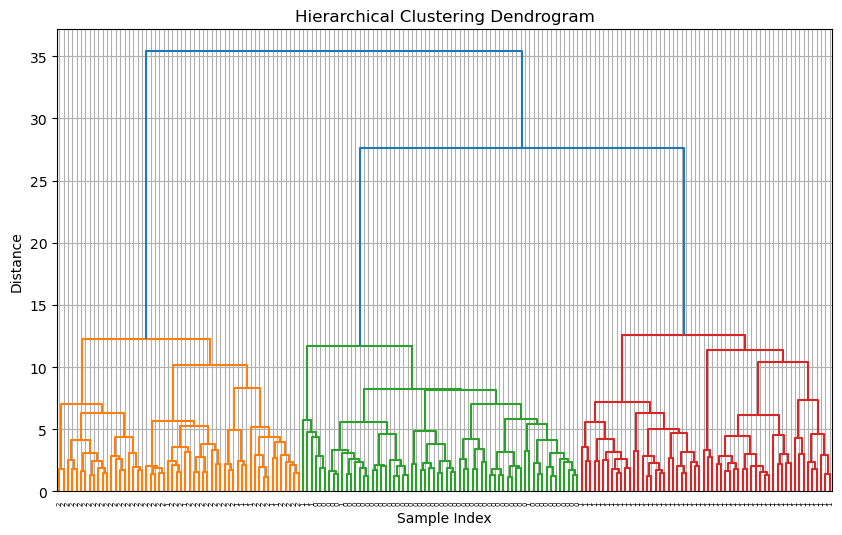

In [5]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)

scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

agglomerative_clustering = AgglomerativeClustering(n_clusters=3)
wine_df['cluster'] = agglomerative_clustering.fit_predict(wine_scaled)

print(wine_df['cluster'].value_counts())

linkage_matrix = linkage(wine_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=data.target, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()